<a href="https://colab.research.google.com/github/Khaled-844AI/Pytorch00_fundamentals/blob/main/01_pytorch_worckflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
# pytorch worckflow


what_we_are_covering = {1:"data (prepare and load)",
                        2:"build model",
                        3:"fitting the model to data (trainning)",
                        4:"Mkaking predictions and evaluating a model (inference)",
                        5:"save and load a model"}

In [151]:
import torch
from torch import nn # nn contains all of pytorch s building blocks for neural networcks
import matplotlib.pyplot as plt

# Check pytorch version

torch.__version__

'1.13.1+cu116'

# 1.DATA (preparing and loading)

 -Data can be almost anyting...
  * "Images"
  * "Excel cheets"
  * "Videos"
  * "Audio"
  * "DNA"

In [152]:
# Create *known* parameters

weigth = 0.7
bias = 0.3

# Create

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) #input
y = X*weigth + bias # output

X[:10],y[:10],len(X),len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [153]:
# Create a training test (split)

train_split = int(0.8 * len(X))
train_split
X_train , y_train = X[:train_split] , y[:train_split]
X_result , y_result = X[train_split:] , y[train_split:]
X_train , y_train , len(X_train) , len(y_train)
print("X_result",X_result,len(X_result))
print("Y_result",y_result,len(y_result))


X_result tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) 10
Y_result tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]]) 10


In [154]:


def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_result,
                     test_labels = y_result,
                     predictions = None):
  
  """
  Plots trainning data  , test data and compare predictions
  """

  plt.figure(figsize=(10 , 7))

  #plot trainning data in blue
  plt.scatter(train_data, train_labels, c="b" , s=4 , label="Training data")

  #plot trainning data in green
  plt.scatter(test_data, test_labels, c="g" , s=4 , label="Testing data")

  #are there a predictions?
  if predictions is not None :
     #plot the predictions if they exist
     plt.scatter(test_data, predictions, c="r" , s=4 , label ="Predictions")
  

  #show the legend
  plt.legend(prop={"size": 14});


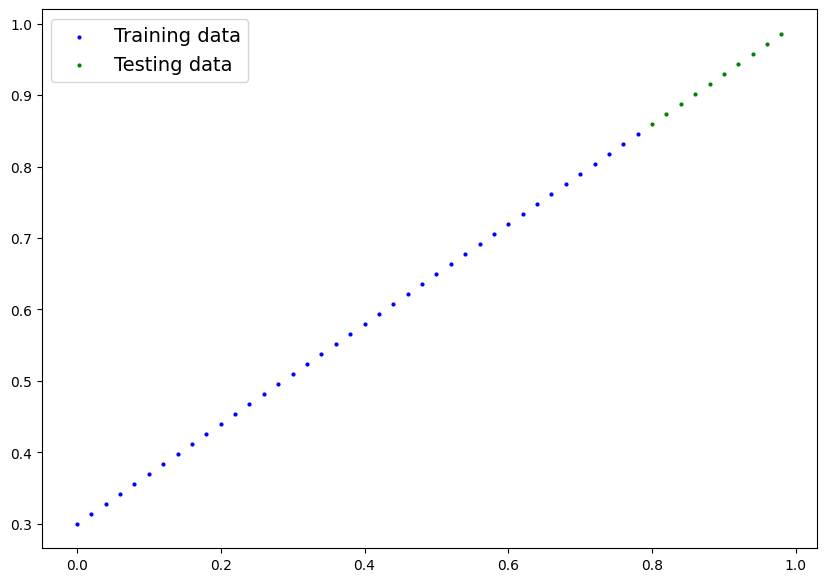

In [155]:
plot_predictions();

In [156]:
# first pytorch model

# Create a linear regression model
class Linear_regression_model(nn.Module): #almost everything enherits from pytorch nn.Module
  def __init__(self):
    super().__init__()
    self.weigths = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                   requires_grad=True,
                                   dtype = torch.float))
# Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # 'x' is the input
        return self.weigths * x + self.bias

        model_0.state_dict()

# 1.Gradiant Descent
# 2.Backpropegation

# Pytorch model building essentials

    1.torch.nn ->contains all of the buildings for computational graphs(another word for neural networcks)
    2.torch.nn.paramater -> what parameters should our model try and learn often a pytorch layer will set these for us.
    3.torch.nn.module -> the base class for all neural networcks modules , " if you subclass it you should write forward"
    4.torch.optim -> this were the optimizers in Pytorch live,they will help with gradient descent
    5. def forward() -> all nn.Module subclasses require you to overwrite forward()

In [157]:
# Now we created our model let s see what s inside it
# we are gonna creat a random seed 

torch.manual_seed(40)
# we r gonna creat an instance for the model(subclass of nn.module)

model_0 = Linear_regression_model()
# check out the parameters
list(model_0.parameters())
 

[Parameter containing:
 tensor([0.9307], requires_grad=True),
 Parameter containing:
 tensor([-0.3482], requires_grad=True)]

In [158]:
# list named parameters 
model_0.state_dict()

OrderedDict([('weigths', tensor([0.9307])), ('bias', tensor([-0.3482]))])

In [159]:
weigth , bias # we need our model to delete the randomness and look at the actual weigth and bias

(0.7, 0.3)

In [160]:
X_result , y_result

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [161]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_result)

y_preds

tensor([[0.3964],
        [0.4150],
        [0.4336],
        [0.4522],
        [0.4709],
        [0.4895],
        [0.5081],
        [0.5267],
        [0.5453],
        [0.5639]])

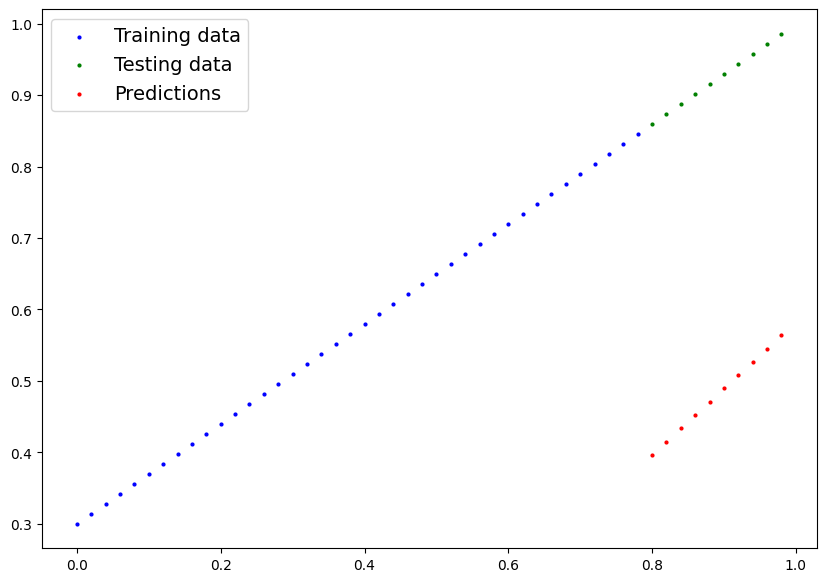

In [162]:
plot_predictions(predictions=y_preds)

 *One way to measure how poor the representation is is by using the loss function

In [163]:
# setup a loss function for a better predictions
loss_fn = nn.L1Loss()

# setup an optimizer " to minmize the distance between the predictions and the results "
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr mens learning rate

# Build a training loop in pytorch and ( a testing loop )
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# Training
# first an epoch is one loop through the data...
for epoch in range(epochs) :
  # Set the model to trainning mode
   model_0.train() # train mode sets all parameters  that require gradients to require gradients
   model_0.eval() # turns off gradiant tracking

   # forward method
   y_pred = model_0(X_train)

   # Calculate the loss
   loss = loss_fn(y_pred , y_train)


   # Optimizer zero grad
   optimizer.zero_grad()

   # Perform the backprobegation on the loss with respect to the model parameters
   loss.backward()

   # Step the optimizer (perform gradiant descent)
   optimizer.step()

  # Testing 
   model_0.eval() # turns of some not needed process
   with torch.inference_mode():
     # Do the forward pass
      test_pred = model_0(X_result)

      # Calculate the loss
      test_loss = loss_fn(test_pred , y_result)

      if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {epoch} | Test : {loss} | Test loss : {test_loss} ")
        print(model_0.state_dict())


Epoch : 0 | Test : 0.5581926107406616 | Test loss : 0.4293646216392517 
OrderedDict([('weigths', tensor([0.9346])), ('bias', tensor([-0.3382]))])
Epoch : 10 | Test : 0.4429827630519867 | Test loss : 0.29465484619140625 
OrderedDict([('weigths', tensor([0.9736])), ('bias', tensor([-0.2382]))])
Epoch : 20 | Test : 0.3277726471424103 | Test loss : 0.15994469821453094 
OrderedDict([('weigths', tensor([1.0126])), ('bias', tensor([-0.1382]))])
Epoch : 30 | Test : 0.2125624716281891 | Test loss : 0.026516448706388474 
OrderedDict([('weigths', tensor([1.0516])), ('bias', tensor([-0.0382]))])
Epoch : 40 | Test : 0.11256273835897446 | Test loss : 0.09451305121183395 
OrderedDict([('weigths', tensor([1.0839])), ('bias', tensor([0.0528]))])
Epoch : 50 | Test : 0.08638741075992584 | Test loss : 0.14412939548492432 
OrderedDict([('weigths', tensor([1.0869])), ('bias', tensor([0.0998]))])
Epoch : 60 | Test : 0.07864297181367874 | Test loss : 0.16114583611488342 
OrderedDict([('weigths', tensor([1.077

In [164]:
with torch.inference_mode():
  ypreds_new = model_0(X_result)

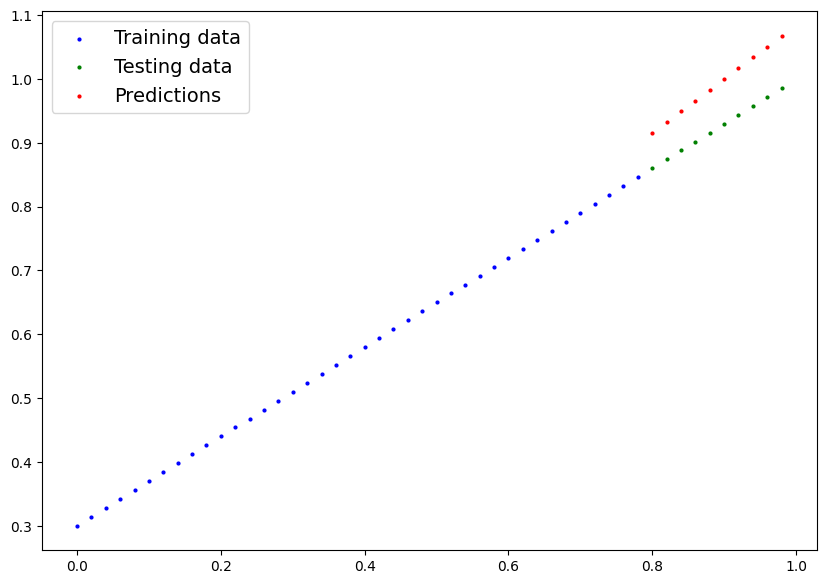

In [165]:
plot_predictions(predictions = ypreds_new)

In [166]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.5581926 , 0.44298276, 0.32777265, 0.21256247, 0.11256274,
       0.08638741, 0.07864297, 0.07428815, 0.07073373, 0.0672056 ,
       0.06376438, 0.06033219, 0.05689963, 0.05346081, 0.05003024,
       0.046596  , 0.04315719, 0.03972831, 0.03629237, 0.0328548 ],
      dtype=float32)

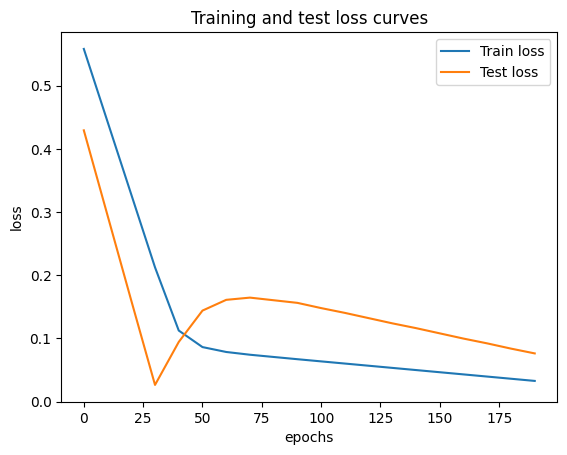

In [167]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend();

# Saving a model in Pytorch

  - there are three metods for saving and loading models :

1.   'torch.save()' - to save pytorch  object in python pickle format
2.   'torch.load()' - to load a saved pytorch object
3.   'torch.Module.nn.load_state_dict()' - to load a model saved state dictionary


In [168]:
model_0.state_dict()

OrderedDict([('weigths', tensor([0.8463])), ('bias', tensor([0.2383]))])

In [169]:
# saving a model
from pathlib import Path

# 1. Create a model directory

Model_Path = Path("Models")
Model_Path.mkdir(parents = True , exist_ok = True)

# 2. model save path

Model_name = "B13.pth"

Model_save_path = Model_Path / Model_name

# 3. Save the model state dict

torch.save(obj = model_0.state_dict(),
           f=Model_save_path)

In [170]:
!ls -l Models

total 8
-rw-r--r-- 1 root root  983 Mar 29 21:39 B13.pth
-rw-r--r-- 1 root root 1047 Mar 29 21:27 MD1.pth


# Loading a pytorch Model

In [171]:
# to load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = Linear_regression_model()

# load the saved state_dict of model_0(updating the new instance)
loaded_model_0.load_state_dict(torch.load(f=Model_save_path))

<All keys matched successfully>

In [172]:
loaded_model_0.state_dict()

OrderedDict([('weigths', tensor([0.8463])), ('bias', tensor([0.2383]))])

In [173]:
# Make some predictions with our loaded model to see

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_result)

loaded_model_preds

tensor([[0.9154],
        [0.9323],
        [0.9492],
        [0.9661],
        [0.9831],
        [1.0000],
        [1.0169],
        [1.0338],
        [1.0508],
        [1.0677]])

In [174]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_result)

y_preds

tensor([[0.9154],
        [0.9323],
        [0.9492],
        [0.9661],
        [0.9831],
        [1.0000],
        [1.0169],
        [1.0338],
        [1.0508],
        [1.0677]])

In [175]:
# compare the loaded model with original
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [176]:
# Practicing
import torch 
from torch import nn

torch.__version__

'1.13.1+cu116'

In [177]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device == {device}")

Device == cuda


In [178]:
# Creating some data using linear regression formula

Weigth = 0.6
Bias = 0.2

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)

Y = Weigth * X + Bias

X[:10] , Y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2120],
         [0.2240],
         [0.2360],
         [0.2480],
         [0.2600],
         [0.2720],
         [0.2840],
         [0.2960],
         [0.3080]]))

In [179]:
3 # splitting the data
split = int(0.8 * len(X))

X_train2 , Y_train2 = X[:split] , Y[:split]
X_test2 , Y_test2 = X[split:] , Y[split:]



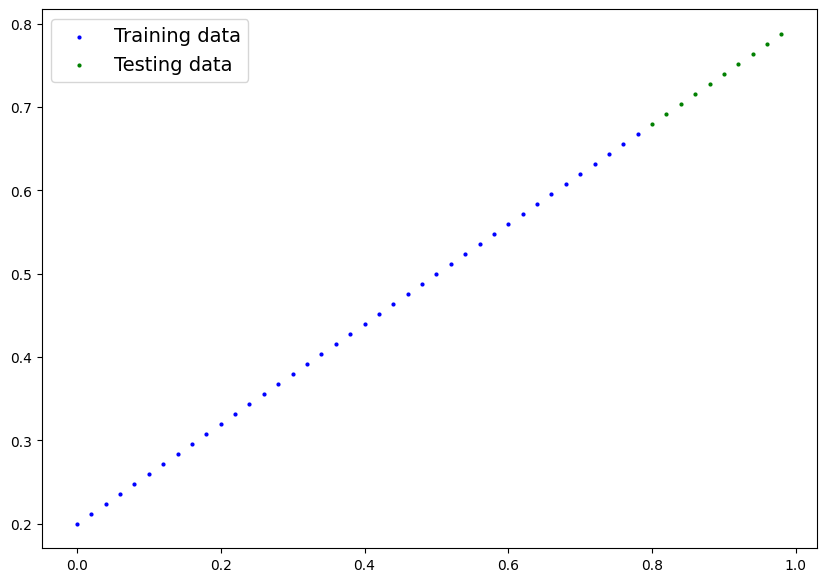

In [180]:
plot_predictions(X_train2,Y_train2,X_test2,Y_test2)

In [181]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [182]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [183]:
# Trainning
import torch 
from torch import nn
# Setup the loss function 

loss_fn2 = nn.L1Loss()



# Setup our optimizer

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

torch.manual_seed(52)

epochs = 200

X_train2 = X_train2.to(device)
X_test2 = X_test2.to(device)
Y_train2 = Y_train2.to(device)
Y_test2 = Y_test2.to(device)


# Put the data on the target device


for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train2)


  loss = loss_fn2(y_pred,Y_train2)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  #Testing
  model_1.eval()

  with torch.inference_mode():
    test_preds = model_1(X_test2)

    test_loss = loss_fn2(test_preds,Y_test2)

  if epoch % 10 == 0 :
    print(f"Epoch : {epoch} | Loss : {loss} | Trst loss : {test_loss}")


Epoch : 0 | Loss : 0.6941779255867004 | Trst loss : 0.7629762887954712
Epoch : 10 | Loss : 0.5789680480957031 | Trst loss : 0.6282663941383362
Epoch : 20 | Loss : 0.4637582004070282 | Trst loss : 0.49355655908584595
Epoch : 30 | Loss : 0.3485483229160309 | Trst loss : 0.3588466942310333
Epoch : 40 | Loss : 0.23333846032619476 | Trst loss : 0.22413687407970428
Epoch : 50 | Loss : 0.11812856048345566 | Trst loss : 0.08942705392837524
Epoch : 60 | Loss : 0.014664086513221264 | Trst loss : 0.027661234140396118
Epoch : 70 | Loss : 0.010410388931632042 | Trst loss : 0.0235457606613636
Epoch : 80 | Loss : 0.006971580442041159 | Trst loss : 0.015273267403244972
Epoch : 90 | Loss : 0.0035398409236222506 | Trst loss : 0.007687687873840332
Epoch : 100 | Loss : 0.0036876804661005735 | Trst loss : 0.012758738361299038
Epoch : 110 | Loss : 0.0036876804661005735 | Trst loss : 0.012758738361299038
Epoch : 120 | Loss : 0.0036876804661005735 | Trst loss : 0.012758738361299038
Epoch : 130 | Loss : 0.0036

In [184]:
model_1.eval()
# Make predictions
with torch.inference_mode():
  y_preds2 = model_1(X_test2)

y_preds2

tensor([[0.6812],
        [0.6931],
        [0.7050],
        [0.7169],
        [0.7288],
        [0.7407],
        [0.7525],
        [0.7644],
        [0.7763],
        [0.7882]], device='cuda:0')

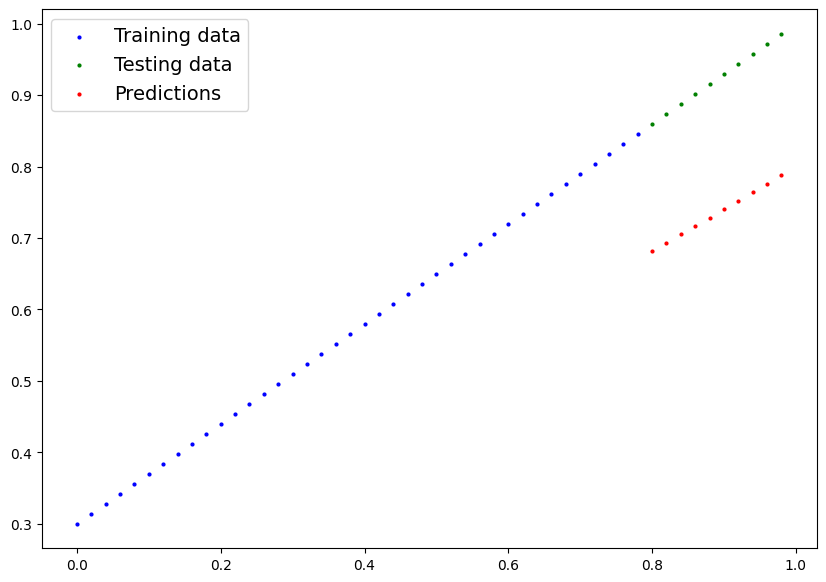

In [185]:

plot_predictions(predictions = y_preds2.cpu())

In [186]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5940]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2060], device='cuda:0'))])

In [187]:
# Save our model

from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "MD1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: Models/MD1.pth


In [188]:
# Load our model

loaded_model2 = LinearRegressionModelV2()

# Load the model saved dict

loaded_model2.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Puth the loaded model to Device
loaded_model2.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [189]:
next(loaded_model2.parameters()).device

device(type='cuda', index=0)

In [190]:
loaded_model2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5940]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2060], device='cuda:0'))])

In [192]:
# Let s evaluate the loaded model

loaded_model2.eval()
with torch.inference_mode():
  loaded_model2_preds = loaded_model2(X_test2)

loaded_model2_preds 


tensor([[0.6812],
        [0.6931],
        [0.7050],
        [0.7169],
        [0.7288],
        [0.7407],
        [0.7525],
        [0.7644],
        [0.7763],
        [0.7882]], device='cuda:0')

In [193]:
y_preds2 == loaded_model2_preds #Cool

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')